In [1]:
from zipfile import ZipFile
file_name = 'coins.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
data_dir = pathlib.Path("coins/")
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

408


In [3]:
def trainNN(datadir,epochs,img_height,img_width):

  batch_size = 64
  # img_height = 180
  # img_width = 180

  train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
  
  val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

  class_names = train_ds.class_names

  AUTOTUNE = tf.data.AUTOTUNE
  train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
  val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

  normalization_layer = layers.Rescaling(1./255)
  normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
  image_batch, labels_batch = next(iter(normalized_ds))
  first_image = image_batch[0]
  # Notice the pixel values are now in `[0,1]`.
  #print(np.min(first_image), np.max(first_image))

  num_classes = len(class_names)

  model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
  ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  #model.summary() 
  # epochs=25

  history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
  )

  return model, history, class_names


Found 408 files belonging to 4 classes.
Using 327 files for training.
Found 408 files belonging to 4 classes.
Using 81 files for validation.


2024-04-09 20:42:41.981362: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-09 20:42:41.981385: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-09 20:42:41.981393: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-09 20:42:41.981410: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-09 20:42:41.981433: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


/Users/sherpa/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-09 20:42:42.903602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.2407 - loss: 2.2907 - val_accuracy: 0.2222 - val_loss: 1.3203
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.3732 - loss: 1.2799 - val_accuracy: 0.5432 - val_loss: 1.1278
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6408 - loss: 0.9747 - val_accuracy: 0.5926 - val_loss: 0.8345
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.5848 - loss: 0.7529 - val_accuracy: 0.8025 - val_loss: 0.6285
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.7651 - loss: 0.5490 - val_accuracy: 0.8889 - val_loss: 0.5183
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.7745 - loss: 0.5162 - val_accuracy: 0.7778 - val_loss: 0.4760
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.7510 - loss: 0.4750 - val_accuracy: 0.8395 - val_loss: 0.3999
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.8382 - loss: 0.3680 - val_accuracy: 0.9136 - val_loss: 0.4

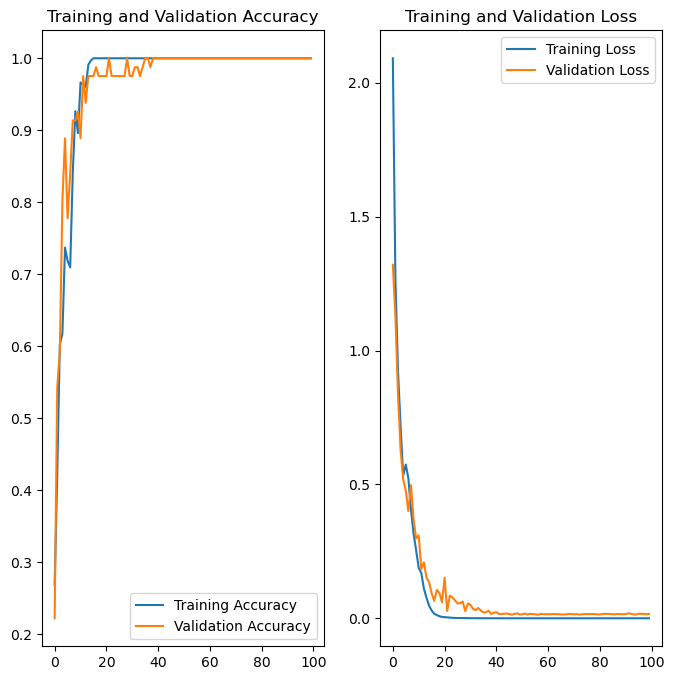

In [4]:
epochs = 100
img_height = 180
img_width = 180

model, history, class_names = trainNN(data_dir,epochs,img_height,img_width)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

created folder :  tmpImages


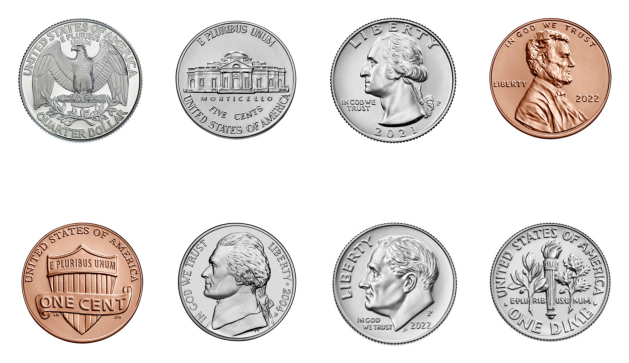

In [5]:
# Define function to extract individual coins.
import cv2 as cv
import os
from PIL import Image

MYDIR = ("tmpImages")
CHECK_FOLDER = os.path.isdir(MYDIR)
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

def getCoinsFromImage(imageFile,min_r,max_r):
  img = plt.imread(imageFile)
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
  blurred = cv.medianBlur(gray, 1)
  
  circles = cv.HoughCircles(
        blurred,  # source image (blurred and grayscaled)
        cv.HOUGH_GRADIENT,  # type of detection
        1,  # inverse ratio of accumulator res. to image res.
        250,  # minimum distance between the centers of circles
        param1=100,  # Gradient value passed to edge detection
        param2=30,  # accumulator threshold for the circle centers
        minRadius=min_r,  # min circle radius
        maxRadius=max_r,  # max circle radius
    )
  
  separateCoins = []
  count = 0
  for detected_circle in circles[0]:    
    x, y, r = detected_circle
    r = 1.2*r
    i1 = int(x-r); i2 = int(x+r);
    j1 = int(y-r); j2 = int(y+r);
    imgSingle = Image.fromarray(img[j1:j2,i1:i2])
    imageBox = imgSingle.getbbox()
    croppedImage = imgSingle.crop(imageBox)
    croppedImage.save(f'tmpImages/image{count}.jpg')
    separateCoins.append(croppedImage)
    count = count + 1
  return separateCoins

# Call the function to test it.
imageFile = "coins.jpg"
# min_r = 150
# max_r = 180

min_r = 300
max_r = 320


coins = getCoinsFromImage(imageFile,min_r,max_r)
for i in range(len(coins)):
  plt.subplot(2,4,i+1)
  plt.imshow(coins[i])
  plt.axis("off")
plt.tight_layout();  

In [6]:
def identifyImage(img):
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  return score, np.argmax(score)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
This image most likely belongs to quarter with a 99.98 percent confidence.
Value of coin: 25


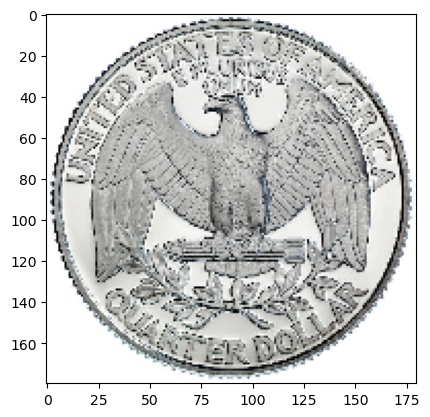

In [7]:
# Test the code
img = tf.keras.utils.load_img('coins/quarter/quarter2.jpeg', 
                              target_size=(img_height, img_width))
score,id = identifyImage(img)
print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[id], 100 * np.max(score))
  )
plt.imshow(img)

value = [10,5,1,25]
print(f'Value of coin: {value[id]}')

# Count total amount of money

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Total: 82 cents


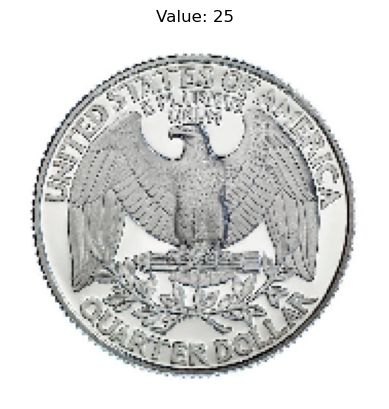

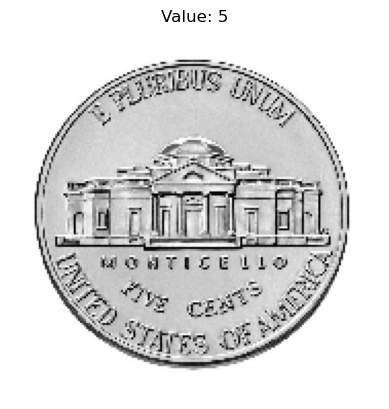

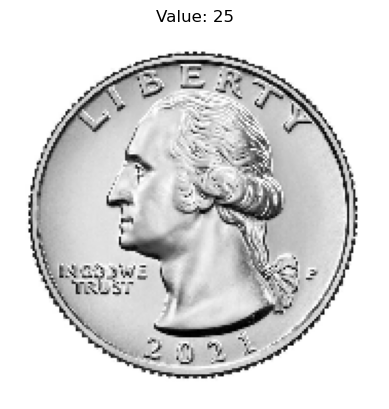

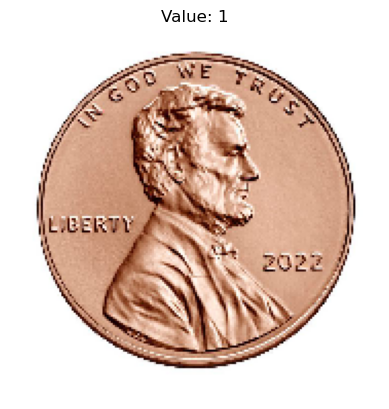

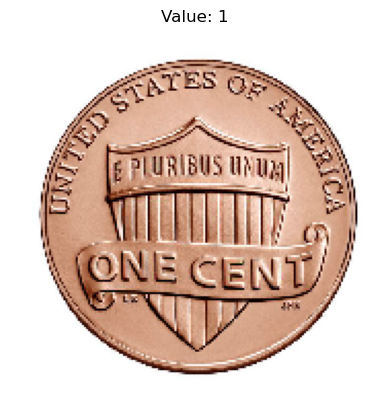

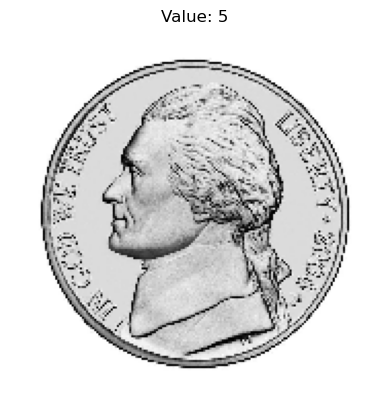

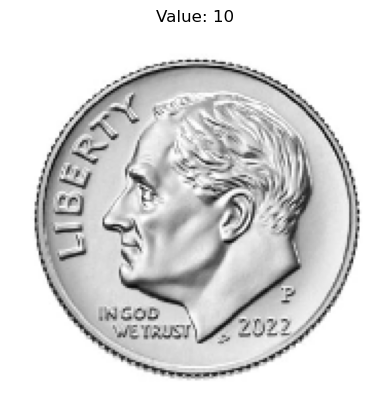

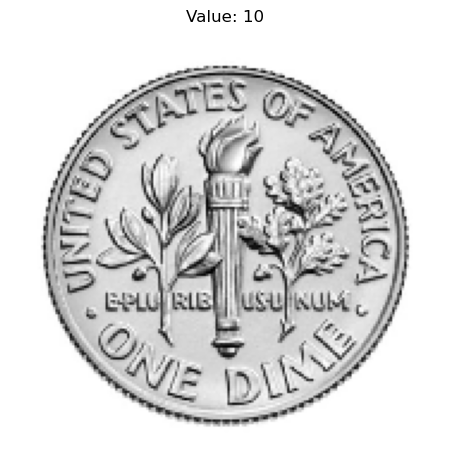

In [8]:
from PIL import Image

total = 0
for i in range(len(coins)):
  testImage = tf.keras.utils.load_img(f'tmpImages/image{i}.jpg', target_size=(img_height, img_width))  
  score, id = identifyImage(testImage) 
  total = total + value[id]
  plt.figure()
  plt.imshow(testImage)
  plt.title(f'Value: {value[id]}')
  plt.axis("off")

plt.tight_layout()
print(f'Total: {total} cents')

